# Optimización de ingresos para una tienda en línea: Hipótesis y análisis de test A/B

En el competitivo mundo del comercio electrónico, tomar decisiones informadas basadas en datos es crucial para aumentar los ingresos y mejorar la experiencia del usuario. Este proyecto tiene como objetivo priorizar diversas hipótesis propuestas por el departamento de marketing de una gran tienda en línea y validar su efectividad mediante la realización de pruebas A/B.

En la primera parte del proyecto, se utilizarán los frameworks ICE (Impacto, Confianza, Esfuerzo) y RICE (Alcance, Impacto, Confianza, Esfuerzo) para priorizar las hipótesis recopiladas. Estas hipótesis serán evaluadas y ordenadas según su potencial de generar ingresos y su viabilidad de implementación.

La segunda parte del proyecto se centrará en el análisis de los resultados de un test A/B realizado. Los datos de pedidos y visitas se analizarán para identificar tendencias, calcular métricas clave como la tasa de conversión y el tamaño promedio de los pedidos, y determinar la significancia estadística de las diferencias observadas entre los grupos de prueba. Este análisis permitirá tomar decisiones basadas en evidencia sobre la adopción de las hipótesis propuestas.

Este estudio proporcionará una guía práctica para la priorización de iniciativas en el comercio electrónico y la evaluación de su impacto real mediante técnicas de análisis de datos y pruebas controladas.

## Preparación de los datos para el análisis

### Importar librerías

In [4]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Cargar datos

In [5]:
hypotheses = pd.read_csv('/Users/samanthaestudillo/Documents/Tripleten/Sprint 9 - Tomar decisiones de negocio basadas en datos/hypotheses_us.csv', sep= ';')
orders = pd.read_csv('/Users/samanthaestudillo/Documents/Tripleten/Sprint 9 - Tomar decisiones de negocio basadas en datos/orders_us.csv')
visits = pd.read_csv('/Users/samanthaestudillo/Documents/Tripleten/Sprint 9 - Tomar decisiones de negocio basadas en datos/visits_us.csv')

### Optimizar datos

#### Tabla *hypotheses*

In [6]:
hypotheses.info()
hypotheses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


#### Tabla *orders*

In [7]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.drop_duplicates(inplace=True) # Verificar y eliminar duplicados

# Verificar si algún visitante está en ambos grupos
visitor_group_counts = orders.groupby('visitor_id')['group'].nunique()
multiple_groups_visitors = visitor_group_counts[visitor_group_counts > 1].index

# Eliminar los registros de visitantes que están en ambos grupos
orders = orders[~orders['visitor_id'].isin(multiple_groups_visitors)]

In [8]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1016 non-null   int64  
 1   visitor_id      1016 non-null   int64  
 2   date            1016 non-null   object 
 3   revenue         1016 non-null   float64
 4   group           1016 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 47.6+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


#### Tabla *visits*

In [9]:
visits.drop_duplicates(inplace=True)

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


##  Priorizar hipótesis

### ICE 

In [11]:
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']

selected_columns_ice = ['Hypothesis', 'ICE']
sorted_data = hypotheses[selected_columns_ice].sort_values(by='ICE', ascending=False)
print(sorted_data)

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Los resultados del framework ICE muestran la priorización de las hipótesis basadas en su impacto, confianza y el esfuerzo necesario para implementarlas. El ICE también presenta la 8, 0 y 7 como las hipótesis más prometedoras.

### RICE

In [12]:
hypotheses['RICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']

selected_columns_rice = ['Hypothesis', 'RICE']
sorted_data = hypotheses[selected_columns_rice].sort_values(by='RICE', ascending=False)

print(sorted_data)

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


El framework RICE (Reach, Impact, Confidence, Effort) añade el alcance (Reach) al cálculo, proporcionando una visión más completa de cada hipótesis. Nuevamente tenemos la 7 y 0 dentro de las hipotesis más prometedoras, esta vez incluyendo la 2. 

### Comparación de prioridades utilizando ICE y RICE

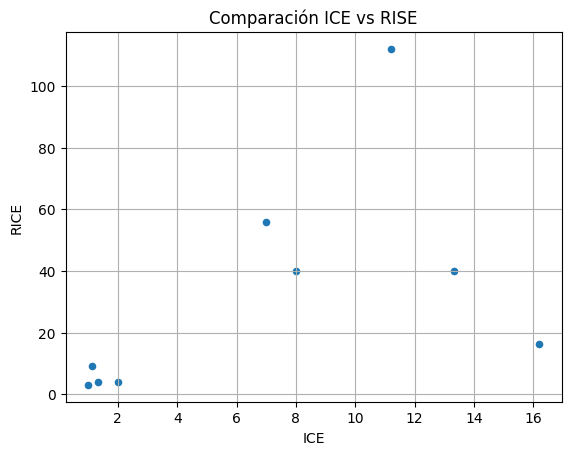

In [13]:
hypotheses.plot(kind='scatter', x='ICE', y='RICE')
plt.xlabel('ICE')
plt.ylabel('RICE')
plt.title('Comparación ICE vs RISE')
plt.grid(True)
plt.show()

Comparando los resultados de las hipótesis utilizando los frameworks ICE y RICE:

- Hypothesis 7: En ICE está en la tercera posición, mientras que en RICE es la primera, indicando que su alto alcance incrementa significativamente su prioridad.
- Hypothesis 2: Subió de la quinta posición en ICE a la segunda en RICE, demostrando que el alcance es un factor importante para esta hipótesis.
- Hypothesis 0: Mantuvo una posición alta en ambos métodos, aunque bajó ligeramente en RICE.
- Hypothesis 8: Pasó de la primera posición en ICE a la quinta en RICE, sugiriendo que su alcance es menor comparado con otras hipótesis.

## Análisis de test A/B

### Ingreso acumulado por grupo.

In [14]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date' : 'max',
     'group' : 'max',
     'transaction_id' : pd.Series.nunique, 
     'visitor_id' : pd.Series.nunique, 
     'revenue' : 'sum'}),axis=1).sort_values(by=['date','group'])

visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(
    visits['date'] <= x['date'], visits['group'] == x['group'])].agg(
    {'date': 'max',
     'group': 'max', 
     'visits': 'sum'}),axis=1,).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulativeData.columns = [
    'date',
    'group',
    'transactions',
    'buyers',
    'revenue',
    'visitors',]

print(cumulativeData)

         date group  transactions  buyers  revenue  visitors
0  2019-08-01     A            23      19   2266.6       719
1  2019-08-01     B            17      17    967.2       713
2  2019-08-02     A            42      36   3734.9      1338
3  2019-08-02     B            40      39   3535.3      1294
4  2019-08-03     A            66      60   5550.1      1845
..        ...   ...           ...     ...      ...       ...
57 2019-08-29     B           510     490  74576.7     17708
58 2019-08-30     A           460     437  52363.7     18037
59 2019-08-30     B           531     511  77863.5     18198
60 2019-08-31     A           468     445  53212.0     18736
61 2019-08-31     B           548     528  79651.2     18916

[62 rows x 6 columns]


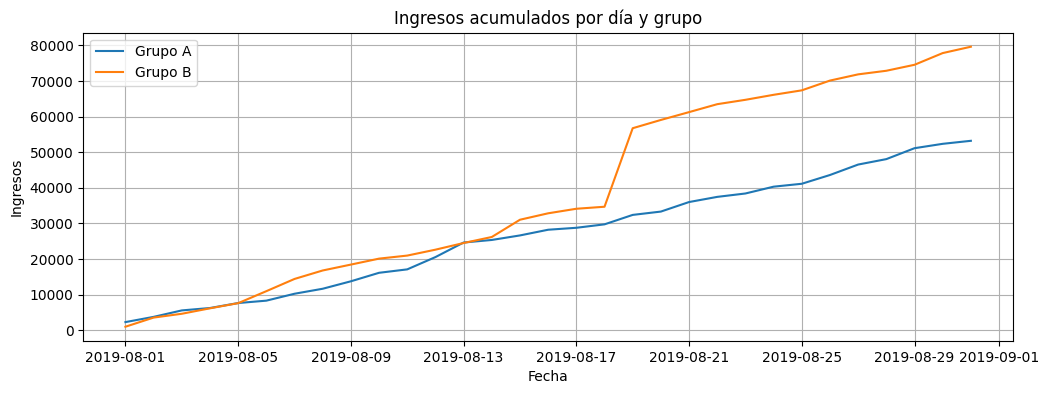

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]

plt.figure(figsize=(12, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Grupo A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Ingresos acumulados por día y grupo')
plt.legend()
plt.grid(True)
plt.show()

El Grupo B muestra consistentemente ingresos acumulados más altos que el Grupo A. La diferencia de ingresos acumulados entre ambos grupos aumenta con el tiempo, indicando que el Grupo B ha tenido un mejor desempeño en términos de ingresos generados. Podríamos decir que la variación implementada en el Grupo B es efectiva y contribuye positivamente a los ingresos y la actividad de los usuarios, que los usuarios en este grupo encuentran el proceso de compra más atractivo o fácil, lo que podría ser resultado de una mejor experiencia de usuario, promociones más atractivas, o mejoras en el producto.

### Tamaño de pedido promedio

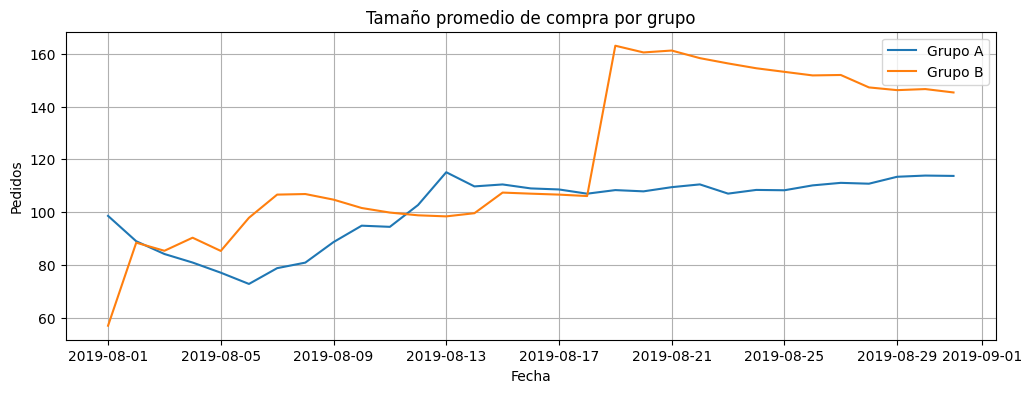

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(
    cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], 
    label='Grupo A')
plt.plot(
    cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], 
    label='Grupo B')
plt.xlabel('Fecha')
plt.ylabel('Pedidos')
plt.title('Tamaño promedio de compra por grupo')
plt.legend()
plt.grid(True)
plt.show()

El Grupo A muestra una tendencia de crecimiento más moderada en el tamaño de pedido promedio acumulado, con incrementos y fluctuaciones, mientras que el Grupo B muestra una tendencia de crecimiento más pronunciada y con incrementos significativos lo que sugiere que la intervención implementada es efectiva para aumentar el valor promedio de los pedidos.

### Diferencia relativa en el tamaño de pedido promedio

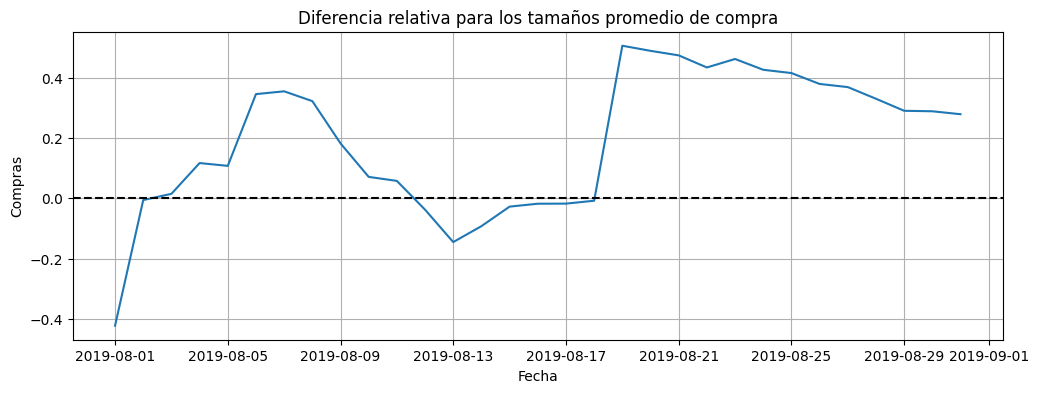

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 4))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])/(
             mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Compras')
plt.title('Diferencia relativa para los tamaños promedio de compra')
plt.grid(True)
plt.show()

En varios puntos, la diferencia entre los segmentos aumenta. ¡Esto significa que deben haber algunos pedidos grandes y valores atípicos!

### Tasa de conversión

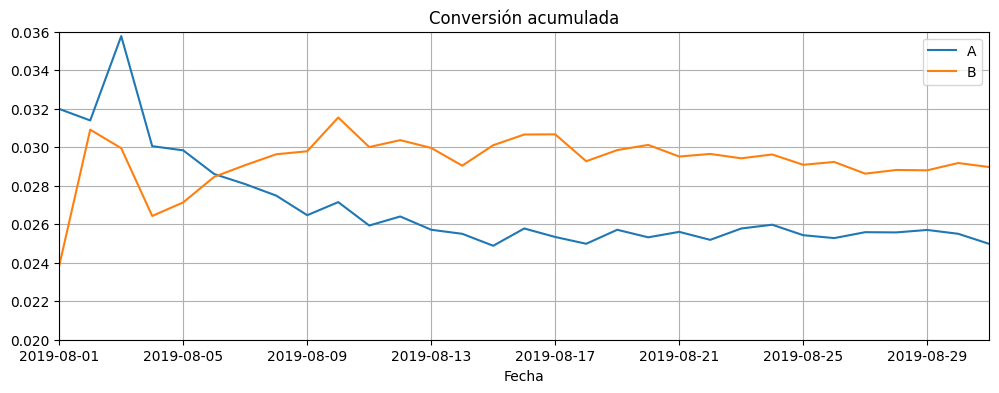

In [18]:
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.date(2019, 8, 1), dt.date(2019, 8, 31), 0.02, 0.036])
plt.xlabel('Fecha')
plt.title('Conversión acumulada')
plt.grid(True)
plt.show()

### Número de pedidos por usuario

In [19]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

     visitor_id  orders
55    249864742       3
138   611059232       3
908  3967698036       3
478  2108163459       3
632  2742574263       3
890  3908431265       3
687  2988190573       3
792  3379260072       2
787  3362039251       2
780  3332057097       2


(array([937.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

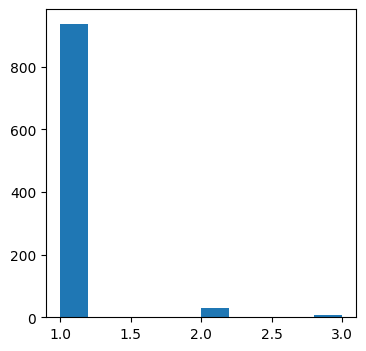

In [20]:
plt.figure(figsize=(4,4))
plt.hist(ordersByUsers['orders'])

Text(0, 0.5, 'Pedidos')

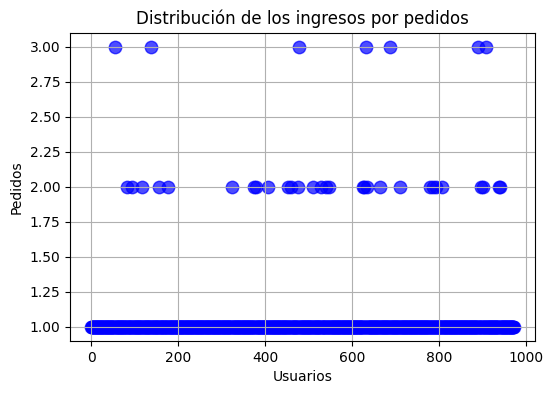

In [21]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(6,4))
plt.scatter(x_values, ordersByUsers['orders'], color='blue', alpha=0.7, s=80)
plt.title('Distribución de los ingresos por pedidos')
plt.xlabel('Usuarios')
plt.grid(True)
plt.ylabel('Pedidos')

La mayoría de los usuarios han realizado solo 1 o 2 pedidos. Esto sugiere que la tienda en línea tiene una base de usuarios que realiza compras de forma esporádica. Un número reducido de usuarios ha realizado 3 pedidos. Estos usuarios son más propensos a repetir sus compras. 

No se observan valores extremadamente altos en términos de número de pedidos por usuario en este conjunto de datos específico.

### Percentiles 95 y 99 

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


No más del 5% de los usuarios realizaron más de 1 pedido y el 1% de los usuarios realizaron más de dos.

Por lo tanto, sería razonable establecer uno o dos pedidos por usuario como límite inferior para el número de pedidos y filtrar las anomalías en base a ello

### Precios de los pedidos

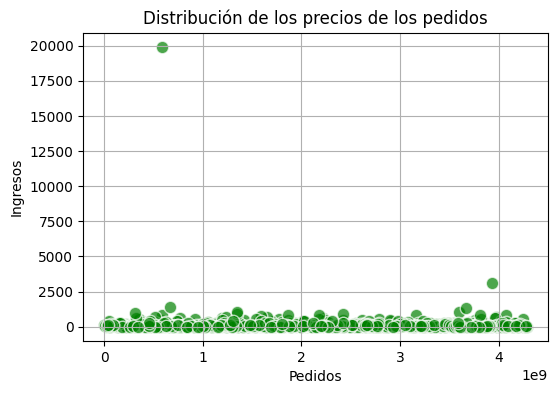

In [23]:
plt.figure(figsize=(6, 4))
plt.scatter(orders['transaction_id'], orders['revenue'], color='green', alpha=0.7, edgecolors='w', s=80)
plt.title('Distribución de los precios de los pedidos')
plt.xlabel('Pedidos')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

En su mayoría los ingresos por pedido de mantienen muy por debado de los 2,500 y son muy pocos los pedidos con ingresos anómalos en cantidad y monto.  

### Dispersión de los precios de los pedidos

In [24]:
print(np.percentile(orders['revenue'], [95, 99]))

[414.275 830.3  ]


Estos percentiles proporcionan una métrica clara para identificar y gestionar anomalías en los precios de los pedidos, lo que ayuda a optimizar las estrategias comerciales y a mantener la satisfacción del cliente. Los pedidos cuyo precio supera el percentil 99 (830.3) pueden considerarse anomalías en términos de ingresos por pedido.

### Significancia estadística en la conversión entre los grupos

In [25]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


La prueba de Mann-Whitney U sugiere que hay una diferencia significativa en el comportamiento de compra entre los grupos A y B. Esto podría indicar que las estrategias de prueba A/B están afectando de manera diferente la propensión a comprar de los usuarios en cada grupo.

Un aumento del 16.0% en la tasa de conversión del grupo B sugiere que las estrategias implementadas en este grupo podrían ser más efectivas en la inducción de compras.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos

In [26]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


La prueba de Mann-Whitney U sugiere que no hay evidencia suficiente para afirmar que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B. Estos resultados proporcionan una visión inicial importante, aunque no concluyente, sobre las diferencias en el tamaño promedio de pedido entre los grupos A y B

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

In [27]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Series([], Name: visitor_id, dtype: int64)
(0,)
0.011
0.160


### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [28]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.862
0.278


### Toma de decisiónes basada en los resultados 

Basado en los resultados de la prueba de diferencia en la conversión entre los grupos A y B, podemos tomar la siguiente decisión:

Decisión: Se considera el grupo B como líder.

- El valor p obtenido (0.011) indica una diferencia estadísticamente significativa en la conversión entre los grupos después de filtrar los datos anómalos. Esto sugiere que las estrategias implementadas podrían estar funcionando mejor el grupo B.

- El grupo B muestra un aumento relativo del 16.0% en la tasa de conversión en comparación con el grupo A. Esta diferencia sugiere que las estrategias aplicadas en el grupo B podrían estar generando resultados más positivos en términos de conversión de visitantes a transacciones.

Basándonos en estos hallazgos, sería prudente considerar al grupo B como líder y evaluar la posibilidad de implementar las estrategias exitosas observadas en este grupo en otros contextos o continuar optimizándolas para mejorar aún más los resultados.